In [130]:
## Maybe try the multiprocessing library....? to run simulatons??

import yfinance as yf
import ta
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [131]:
data = yf.Ticker("NKE")

nke_df = pd.DataFrame(data.history(period='max'))
nke_df_filtered = nke_df[nke_df.index >= '2020-01-01']
nke_df_filtered['Log Return'] = np.log(nke_df_filtered['Close'] / nke_df_filtered['Close'].shift(1))
nke_df_filtered.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Log Return
Date,,,,,,,,
2020-01-02 00:00:00-05:00,95.212937,96.011387,94.893553,96.001991,5644100,0.0,0.0,NaN
2020-01-03 00:00:00-05:00,94.489610,95.814103,94.226592,95.738953,4541800,0.0,0.0,-0.002744
2020-01-06 00:00:00-05:00,94.827798,95.663823,94.752655,95.654434,4612400,0.0,0.0,-0.000883


In [132]:
nke_df_filtered.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Log Return
Date,,,,,,,,
2025-03-04 00:00:00-05:00,77.699997,78.650002,76.779999,77.320000,10034100,0.0,0.0,-0.013999
2025-03-05 00:00:00-05:00,77.330002,78.309998,76.459999,77.809998,9853600,0.0,0.0,0.006317
2025-03-06 00:00:00-05:00,76.739998,78.330002,76.739998,77.709999,9623700,0.0,0.0,-0.001286
2025-03-07 00:00:00-05:00,77.480003,79.000000,76.970001,78.589996,9294300,0.0,0.0,0.011260
2025-03-10 00:00:00-04:00,77.510002,80.190002,76.059998,76.400002,15822600,0.0,0.0,-0.028262
2025-03-11 00:00:00-04:00,75.910004,76.080002,73.620003,74.169998,12837000,0.0,0.0,-0.029623
2025-03-12 00:00:00-04:00,74.360001,74.500000,73.230003,73.580002,12304900,0.0,0.0,-0.007986
2025-03-13 00:00:00-04:00,73.180000,73.940002,71.669998,72.639999,10195900,0.0,0.0,-0.012858
2025-03-14 00:00:00-04:00,73.279999,73.540001,71.320000,71.660004,12183000,0.0,0.0,-0.013583


In [133]:
mu = nke_df_filtered['Close'].mean()
sigma = nke_df_filtered['Close'].std()
print(mu)
print(sigma)
log_mu = nke_df_filtered['Log Return'].mean()
log_sigma = nke_df_filtered['Log Return'].std()
print(log_mu)
print(log_sigma)


n_simulations = 2
n_steps = 252  # 1 trading year (252 days)
start_price = nke_df_filtered['Close'].iloc[0]
print(start_price)
# mu = 0  # Mean return (0 for pure random walk)
# sigma = 24  # Standard deviation of returns



108.90351449167328
24.078356083976338
-0.0002022694536202339
0.022018526193501205
96.00199127197266


In [ ]:
def monte_carlo_simulation(start_price, mu,sigma, n_steps, n_simulations):
    simulations = np.zeros((n_simulations, n_steps))
    # drift = mu - (sigma**2) / 2

    for i in range(n_simulations):
        price = start_price
        for j in range(n_steps):
            #random_shock = np.random.normal(mu, sigma)
            random_shock = np.random.normal(0.08, 1) #.08 comes from the average return of the S&P 500
            #print(random_shock)
            price = price + random_shock
            #print(price)
            simulations[i, j] = price
    
    return simulations

##This approach would be better for log return
def monte_carlo_simulation_take2(start_price, mu,sigma, n_steps, n_simulations):
    simulations = np.zeros((n_simulations, n_steps))

    for i in range(n_simulations):
        price = start_price
        for j in range(n_steps):
            #random_shock = np.random.normal(mu, sigma)
            next_price = np.random.normal(mu, sigma)  # Standard normal distribution
            price = next_price 
            simulations[i, j] = price
    
    return simulations


In [135]:
simulated_prices = monte_carlo_simulation(start_price, mu, sigma, n_steps, n_simulations)
simulated_prices_take2 = monte_carlo_simulation_take2(start_price, mu, sigma, n_steps, n_simulations)

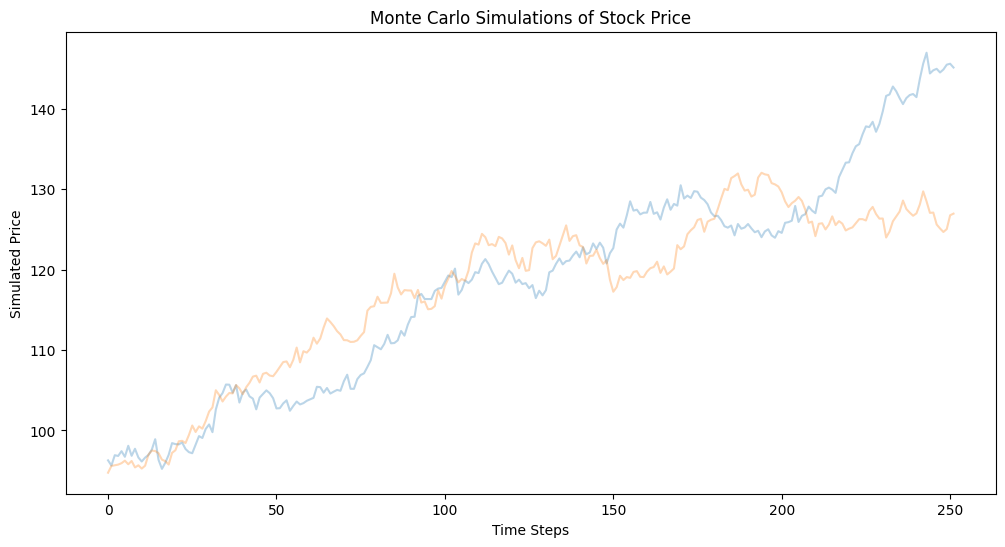

In [136]:
plt.figure(figsize=(12, 6))
for i in range(n_simulations):
    plt.plot(simulated_prices[i], alpha=0.3)  # Plot each simulation
plt.xlabel("Time Steps")
plt.ylabel("Simulated Price")
plt.title("Monte Carlo Simulations of Stock Price")
plt.show()

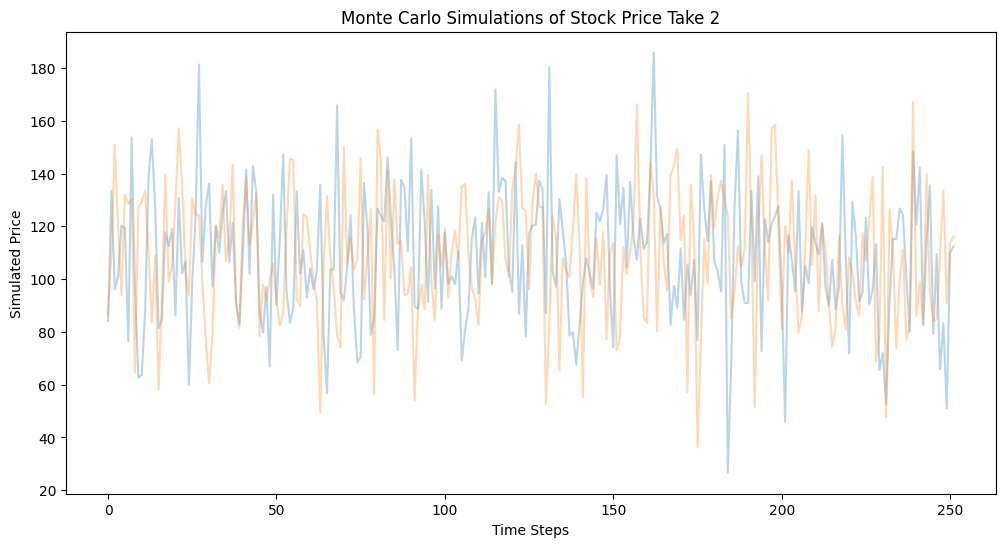

In [137]:
plt.figure(figsize=(12, 6))
for i in range(n_simulations):
    plt.plot(simulated_prices_take2[i], alpha=0.3)  # Plot each simulation
plt.xlabel("Time Steps")
plt.ylabel("Simulated Price")
plt.title("Monte Carlo Simulations of Stock Price Take 2")
plt.show()

73.69999694824219


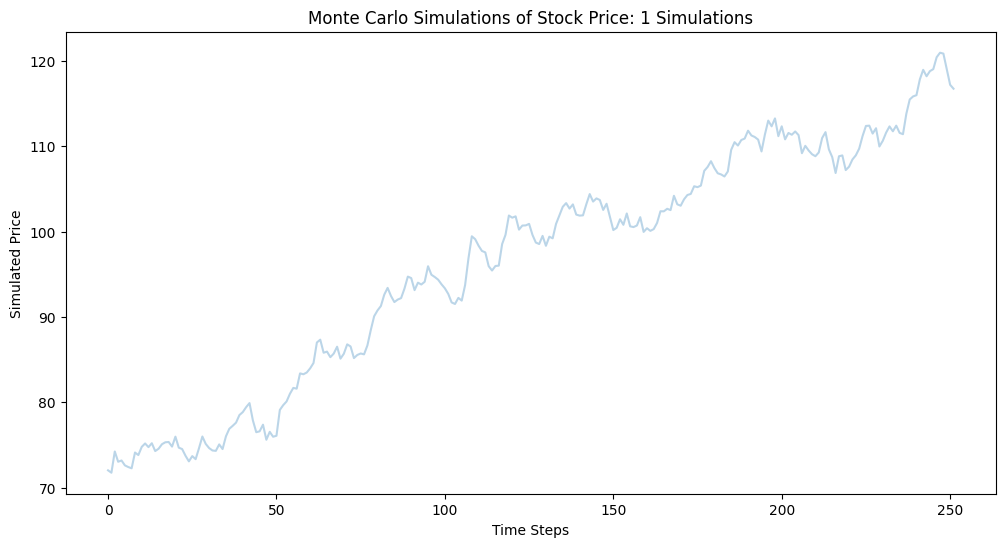

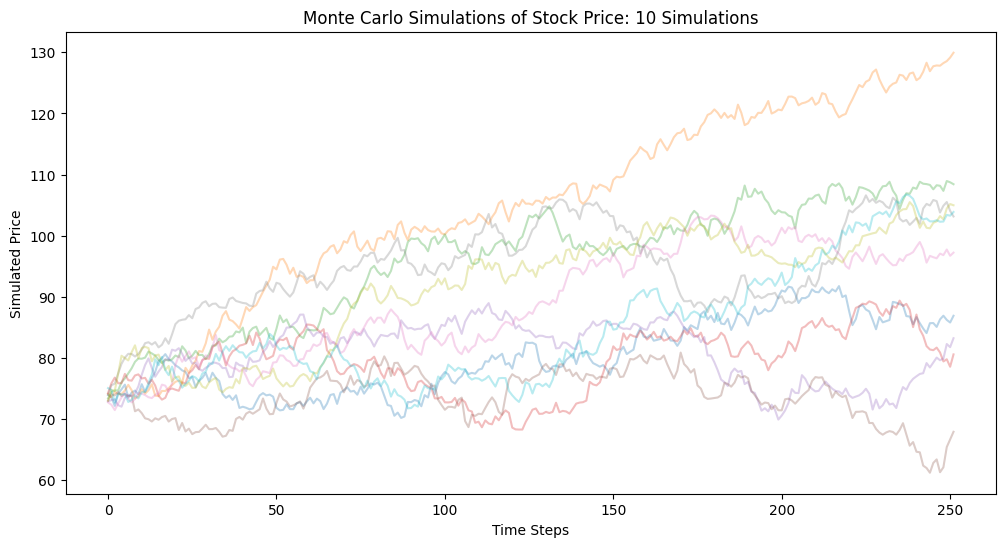

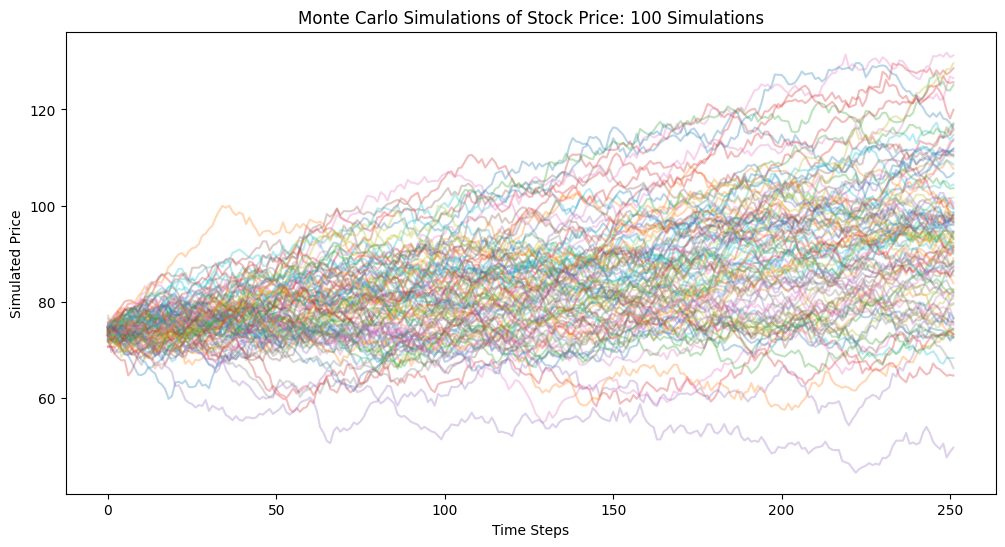

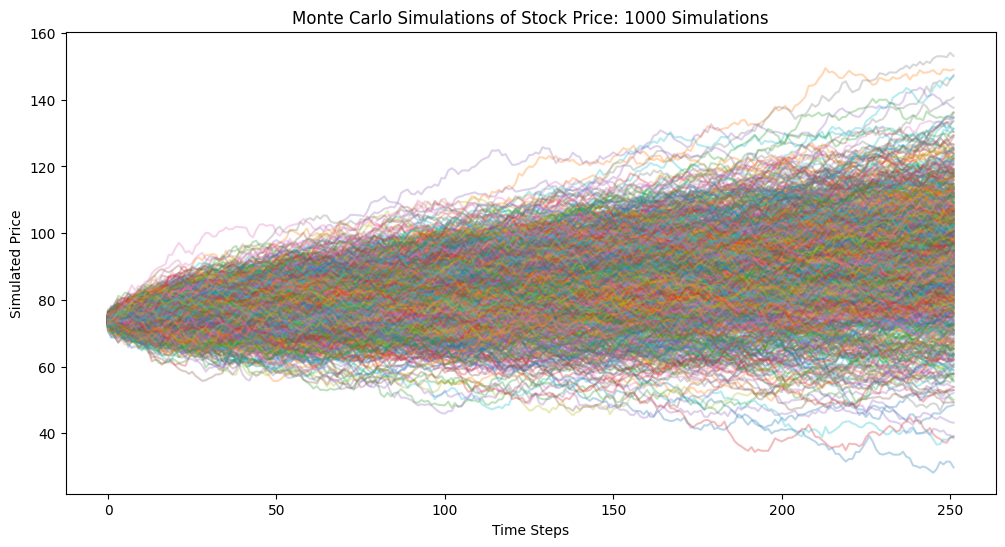

In [138]:
n_simulations = [1, 10, 100, 1000]
# n_simulations = [1, 10, 100, 1000, 10000] ## 10000 takes 22 seconds 1000 only takes 2 seconds
n_steps = 252  # 1 trading year (252 days)
start_price = nke_df_filtered['Close'].iloc[-1]
mu = nke_df_filtered['Close'].mean()
sigma = nke_df_filtered['Close'].std()
print(start_price)

for n in n_simulations:
    simulated_prices = monte_carlo_simulation(start_price, mu, sigma, n_steps, n)
    plt.figure(figsize=(12, 6))
    for i in range(n):
        plt.plot(simulated_prices[i], alpha=0.3)  # Plot each simulation
    plt.xlabel("Time Steps")
    plt.ylabel("Simulated Price")
    plt.title(f"Monte Carlo Simulations of Stock Price: {n} Simulations")
    plt.show()

In [139]:
n = 1000
n_steps = 252

mu = nke_df_filtered['Close'].mean()
sigma = nke_df_filtered['Close'].std()
start_price = start_price = nke_df_filtered['Close'].iloc[-1]
simulated_prices_ = monte_carlo_simulation(start_price, mu, sigma, n_steps, n)

final_prices = simulated_prices[:, -1]  # Last column contains final prices
lower_bound = np.percentile(final_prices, 2.5)  # 2.5th percentile
upper_bound = np.percentile(final_prices, 97.5)  # 97.5th percentile

print(f"95% Confidence Interval: {lower_bound} to {upper_bound}")
print("--------------------")


##Calculating % return  chances
thresholds = [.05, 0.10, 0.20, 0.30, -.05, -0.10, -0.20, -0.30]
threshold_prices = {t: start_price * (1 + t) for t in thresholds}

# Calculate probabilities for each threshold
probabilities = {}
for t, price in threshold_prices.items():
    if t > 0:
        probabilities[f"{int(t * 100)}% return or higher"] = np.mean(final_prices >= price)
    else:
        probabilities[f"{int(t * 100)}% return or lower"] = np.mean(final_prices <= price)

# Print probabilities
for desc, prob in probabilities.items():
    print(f"Probability of {desc}: {prob * 100:.2f}%")
print("--------------------")

##Calculate worst Case and Worst Case returns 
best_case_index = np.argmax(simulated_prices[:, -1])  # Index of highest final price
worst_case_index = np.argmin(simulated_prices[:, -1])  # Index of lowest final price

best_case_val = simulated_prices[best_case_index][-1]
worst_case_val = simulated_prices[worst_case_index][-1]

best_case_ret = best_case_val - start_price
best_case_ret_pct = (best_case_val - start_price) / start_price * 100
print(f"Best Case Return: {best_case_ret} , %: {best_case_ret_pct}")

worst_case_ret = worst_case_val - start_price
worst_case_ret_pct = (worst_case_val - start_price) / start_price * 100
print(f"Worst Case Return: {worst_case_ret} , %: {worst_case_ret_pct}")


95% Confidence Interval: 60.06496543440357 to 124.91760857391107
--------------------
Probability of 5% return or higher: 84.90%
Probability of 10% return or higher: 78.60%
Probability of 20% return or higher: 63.30%
Probability of 30% return or higher: 44.30%
Probability of -5% return or lower: 8.10%
Probability of -10% return or lower: 5.70%
Probability of -20% return or lower: 2.20%
Probability of -30% return or lower: 0.90%
--------------------
Best Case Return: 79.42264367423238 , %: 107.76478556709992
Worst Case Return: -43.94786955724426 , %: -59.63076170560474


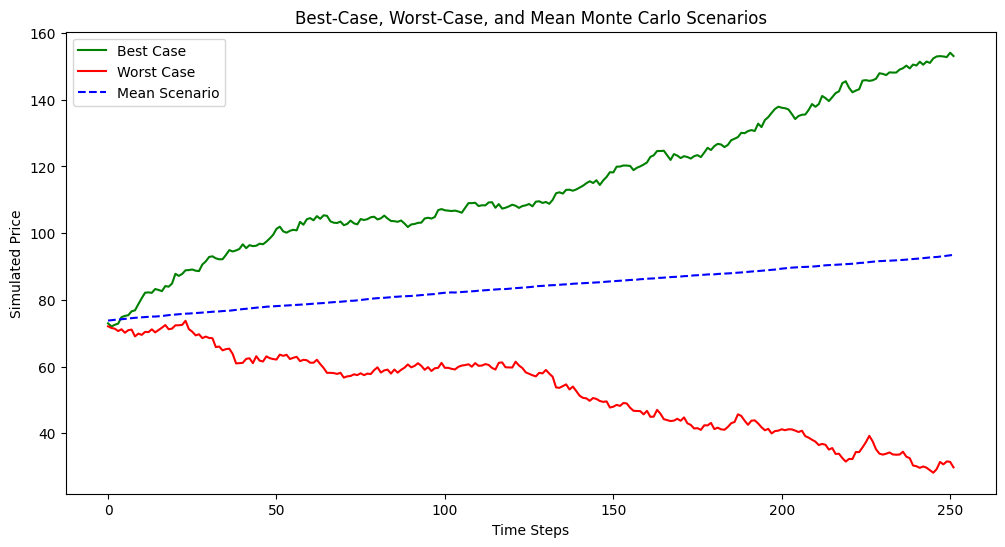

In [140]:
#Case vs Worse Case

best_case_index = np.argmax(simulated_prices[:, -1])  # Index of highest final price
worst_case_index = np.argmin(simulated_prices[:, -1])  # Index of lowest final price

# Extract the best and worst paths
best_case_path = simulated_prices[best_case_index]
worst_case_path = simulated_prices[worst_case_index]

# Calculate the mean scenario (mean price at each time step)
mean_case_path = np.mean(simulated_prices, axis=0)

# Plot the best-case, worst-case, and mean scenarios
plt.figure(figsize=(12, 6))
plt.plot(best_case_path, label="Best Case", color="green")
plt.plot(worst_case_path, label="Worst Case", color="red")
plt.plot(mean_case_path, label="Mean Scenario", color="blue", linestyle="--")
plt.xlabel("Time Steps")
plt.ylabel("Simulated Price")
plt.title("Best-Case, Worst-Case, and Mean Monte Carlo Scenarios")
plt.legend()
plt.show()